In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.express as px


In [2]:
data = pd.read_csv('sample_data/exams.csv')

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [5]:
#checking for missing values
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: xlabel='math score'>

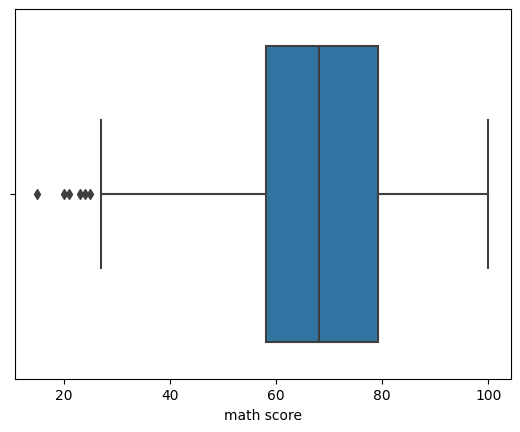

In [4]:
#checking for outliers
sns.boxplot(x=data["math score"])

<Axes: xlabel='reading score'>

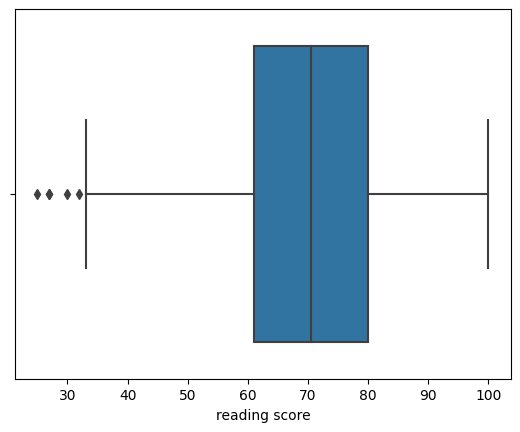

In [ ]:
sns.boxplot(x=data['reading score'])

<Axes: xlabel='writing score'>

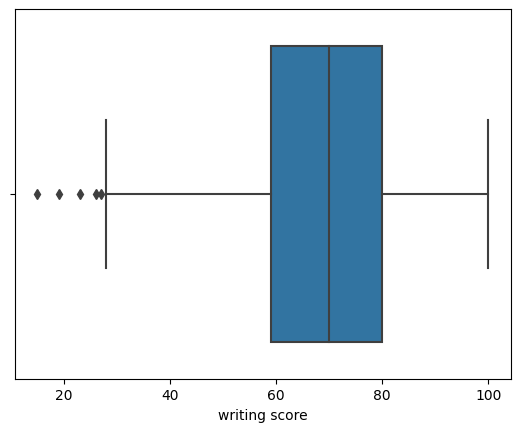

In [ ]:
sns.boxplot(x=data['writing score'])

Not seeing anything to consider dropping rows. I think the lowest scores could be true. 

## EDA

In [6]:
parental_edu = data.groupby(['race/ethnicity', 'parental level of education'])['parental level of education'].count()
parental_edu

race/ethnicity  parental level of education
group A         associate's degree             21
                bachelor's degree               4
                high school                    20
                master's degree                 4
                some college                   15
                some high school               15
group B         associate's degree             41
                bachelor's degree              27
                high school                    43
                master's degree                14
                some college                   40
                some high school               33
group C         associate's degree             59
                bachelor's degree              35
                high school                    74
                master's degree                25
                some college                   79
                some high school               51
group D         associate's degree             59
      

<Axes: xlabel='race/ethnicity'>

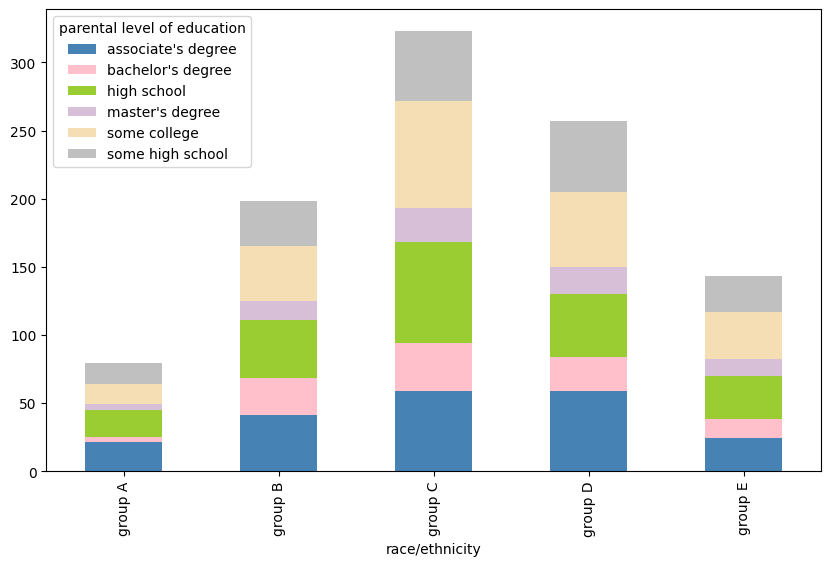

In [7]:
 #parental level of education vs race
parental_edu.unstack().plot(kind='bar', stacked=True, color=['steelblue','pink', 'yellowgreen', 'thistle', 'wheat', 'silver'], figsize=(10,6))

Parents of all educational levels are present in each race group more or less equally.

In [8]:
#parental level of education vs test prep course
test_prep = data.groupby(['test preparation course', 'parental level of education'])['parental level of education'].count()
test_prep

test preparation course  parental level of education
completed                associate's degree              72
                         bachelor's degree               40
                         high school                     72
                         master's degree                 21
                         some college                    78
                         some high school                61
none                     associate's degree             132
                         bachelor's degree               65
                         high school                    143
                         master's degree                 54
                         some college                   146
                         some high school               116
Name: parental level of education, dtype: int64

<Axes: xlabel='test preparation course'>

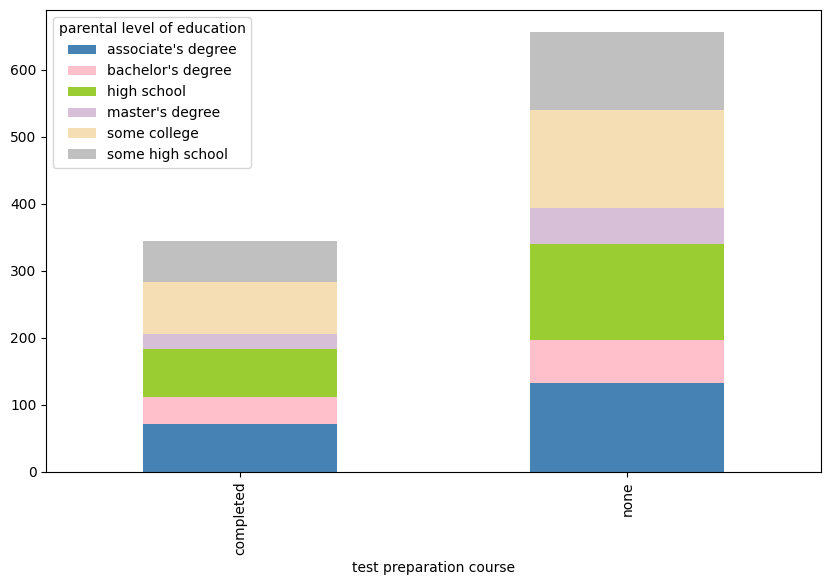

In [9]:
test_prep.unstack().plot(kind='bar', stacked=True, color=['steelblue','pink', 'yellowgreen', 'thistle', 'wheat', 'silver'], figsize=(10,6))

The composition of test preparation course groups against parental level of education is more or less equal too.

Next, I want to see if there is any impact of test prep course on the test scores.

In [11]:
#test prep course vs math score
data['math score alt'] = data['math score'].apply(lambda x: 'high' if x in range(75, 101) 
else('medium' if x in range(45,75) else 'low'))

In [12]:
test_math = data.groupby(['test preparation course', 'math score alt']).size().reset_index(name='count')
test_math

,test preparation course,math score alt,count
0,completed,high,139
1,completed,low,15
2,completed,medium,190
3,none,high,206
4,none,low,60
5,none,medium,390


<Axes: xlabel='count', ylabel='test preparation course'>

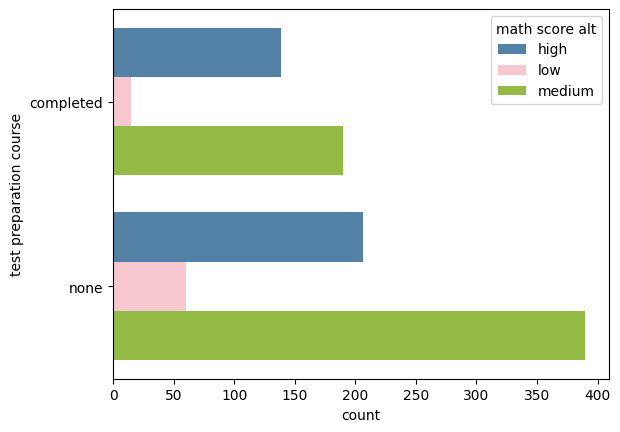

In [13]:
sns.barplot(test_math, x='count', y='test preparation course', hue='math score alt', palette=['steelblue', 'pink', 'yellowgreen'])

Those who completed test prep course seem to have more higher math scores.

In [14]:
#test prep course vs reading score
data['reading score alt'] = data['reading score'].apply(lambda x: 'high' if x in range(75, 101) 
else('medium' if x in range(45,75) else 'low'))

In [15]:
test_reading = data.groupby(['test preparation course', 'reading score alt']).size().reset_index(name='count')
test_reading

,test preparation course,reading score alt,count
0,completed,high,178
1,completed,low,3
2,completed,medium,163
3,none,high,222
4,none,low,27
5,none,medium,407


<Axes: xlabel='count', ylabel='test preparation course'>

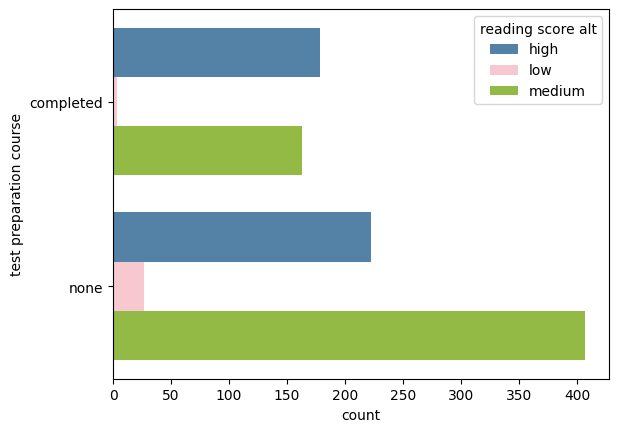

In [16]:
sns.barplot(test_reading, x='count', y='test preparation course', hue='reading score alt', palette=['steelblue', 'pink', 'yellowgreen'])

Those who have taken test prep course seem to have more high reading scores.

In [17]:
#test prep course vs writing score
data['writing score alt'] = data['writing score'].apply(lambda x: 'high' if x in range(75, 101) 
else('medium' if x in range(45,75) else 'low'))

In [18]:
test_writing = data.groupby(['test preparation course', 'writing score alt']).size().reset_index(name='count')
test_writing

,test preparation course,writing score alt,count
0,completed,high,185
1,completed,low,2
2,completed,medium,157
3,none,high,190
4,none,low,55
5,none,medium,411


<Axes: xlabel='count', ylabel='test preparation course'>

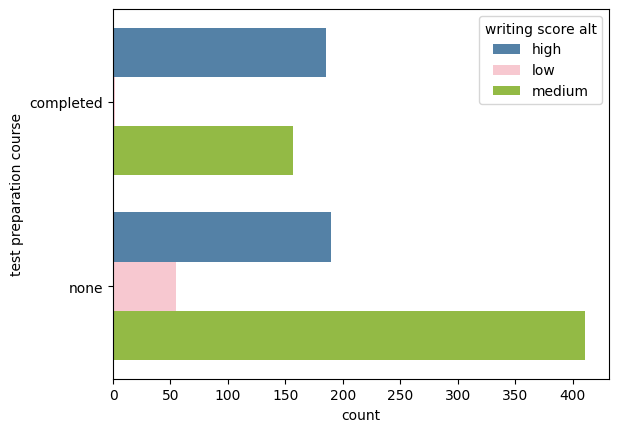

In [19]:
sns.barplot(test_writing, x='count', y='test preparation course', hue='writing score alt', palette=['steelblue', 'pink', 'yellowgreen'])

Again, it looks like taking a test prep course has an impact on your writing score. 

Now, I want to see if there is any connection between gender and test score.

[Text(8.375000000000002, 0.5, '')]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


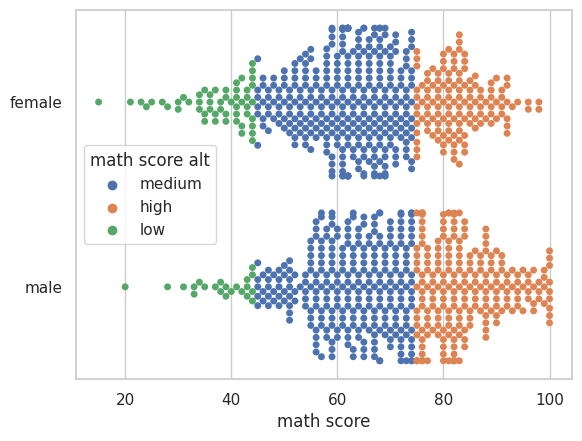

In [20]:
sns.set_theme(style="whitegrid", palette="deep")

ax = sns.swarmplot(data=data, x="math score", y="gender", hue="math score alt")
ax.set(ylabel="")

[Text(8.375000000000002, 0.5, '')]

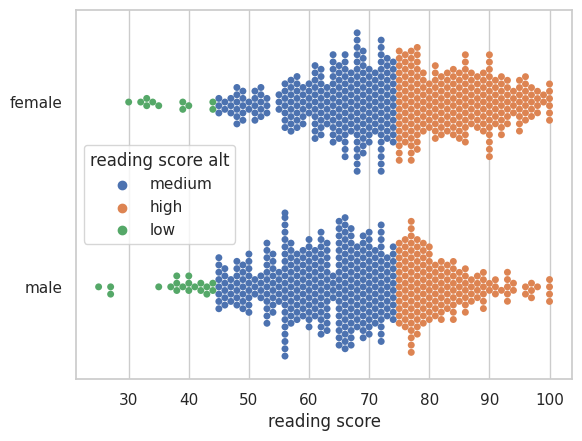

In [21]:
sns.set_theme(style="whitegrid", palette="deep")

ax = sns.swarmplot(data=data, x="reading score", y="gender", hue="reading score alt")
ax.set(ylabel="")

[Text(8.375000000000002, 0.5, '')]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


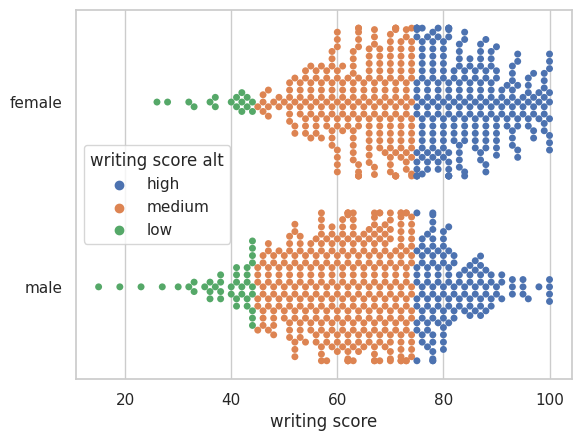

In [22]:
sns.set_theme(style="whitegrid", palette="deep")

ax = sns.swarmplot(data=data, x="writing score", y="gender", hue="writing score alt")
ax.set(ylabel="")

Overall, it seems females perform better than males at reading and writing, and worse at math.

In [25]:
test_gender = data.groupby(['test preparation course', 'gender']).size().reset_index(name='count')
test_gender

,test preparation course,gender,count
0,completed,female,177
1,completed,male,167
2,none,female,315
3,none,male,341


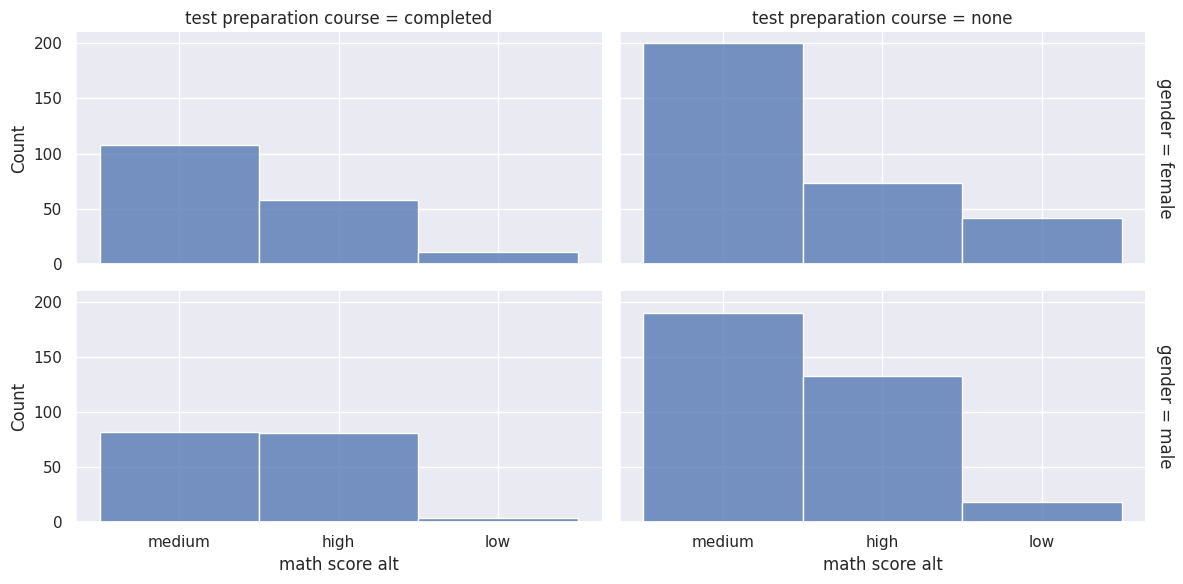

In [24]:
sns.set_theme(style="darkgrid")

sns.displot(
    data, x="math score alt", col="test preparation course", row="gender",
    binwidth=6, height=3, aspect=2, facet_kws=dict(margin_titles=True),
)

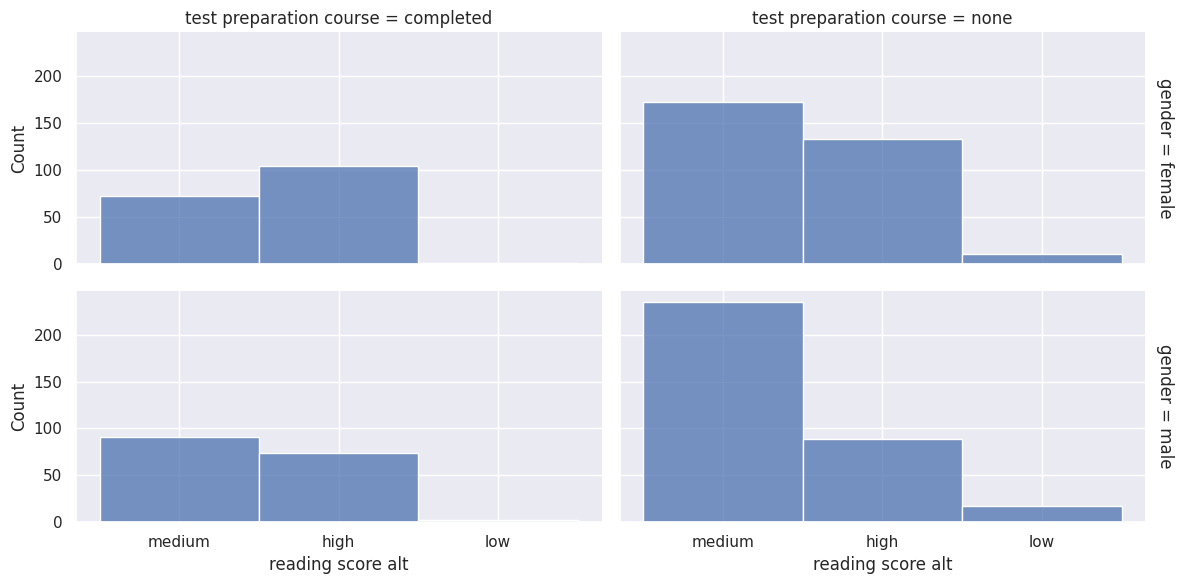

In [ ]:
sns.set_theme(style="darkgrid")

sns.displot(
    data, x="reading score alt", col="test preparation course", row="gender",
    binwidth=6, height=3, aspect=2, facet_kws=dict(margin_titles=True),
)

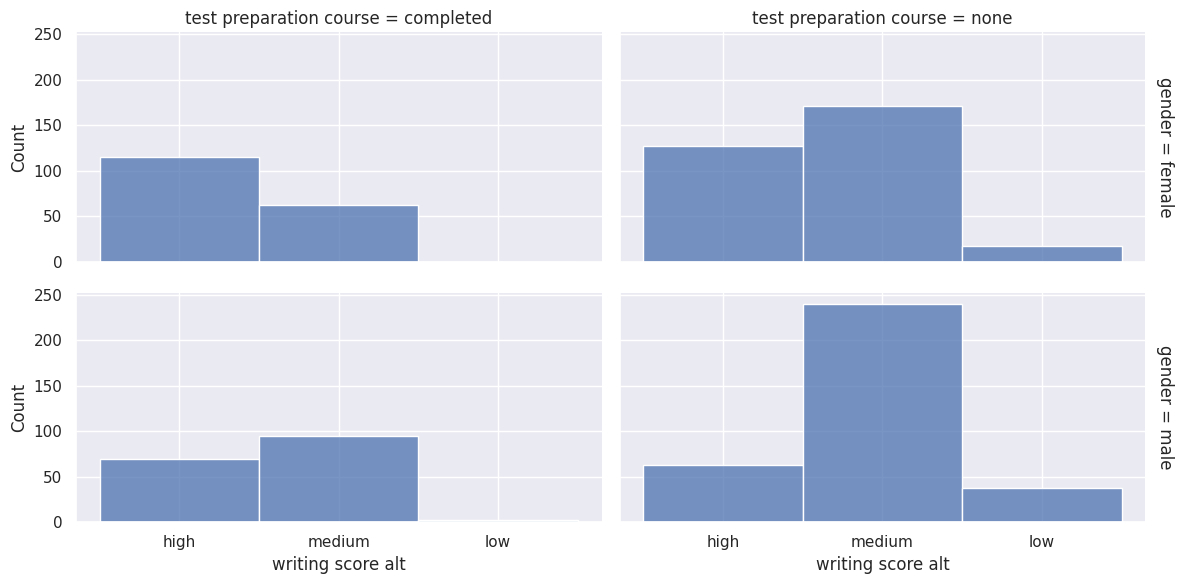

In [ ]:
sns.set_theme(style="darkgrid")

sns.displot(
    data, x="writing score alt", col="test preparation course", row="gender",
    binwidth=6, height=3, aspect=2, facet_kws=dict(margin_titles=True),
)

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score alt,reading score alt,writing score alt
0,female,group D,some college,standard,completed,59,70,78,medium,medium,high
1,male,group D,associate's degree,standard,none,96,93,87,high,high,high
2,female,group D,some college,free/reduced,none,57,76,77,medium,high,high
3,male,group B,some college,free/reduced,none,70,70,63,medium,medium,medium
4,female,group D,associate's degree,standard,none,83,85,86,high,high,high


In [ ]:
lunch_race = data.groupby(['lunch', 'race/ethnicity']).size().reset_index(name='count')
lunch_race

,lunch,race/ethnicity,count
0,free/reduced,group A,21
1,free/reduced,group B,75
2,free/reduced,group C,113
3,free/reduced,group D,85
4,free/reduced,group E,46
5,standard,group A,58
6,standard,group B,123
7,standard,group C,210
8,standard,group D,172
9,standard,group E,97


<Axes: xlabel='count', ylabel='race/ethnicity'>

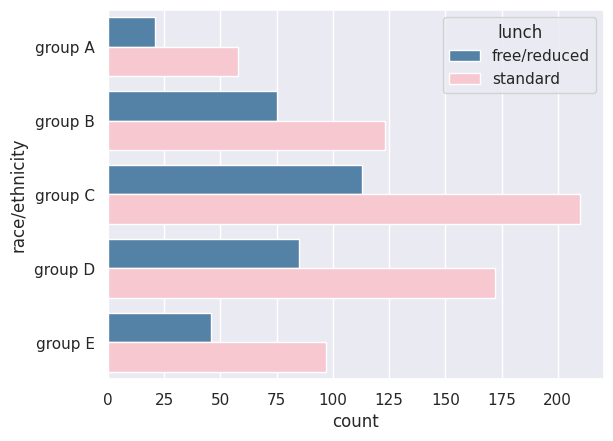

In [ ]:
sns.barplot(lunch_race, x='count', y='race/ethnicity', hue='lunch', palette=['steelblue', 'pink'])

In [ ]:
data['lunch'].value_counts()

standard        660
free/reduced    340
Name: lunch, dtype: int64

[Text(-36.875, 0.5, '')]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


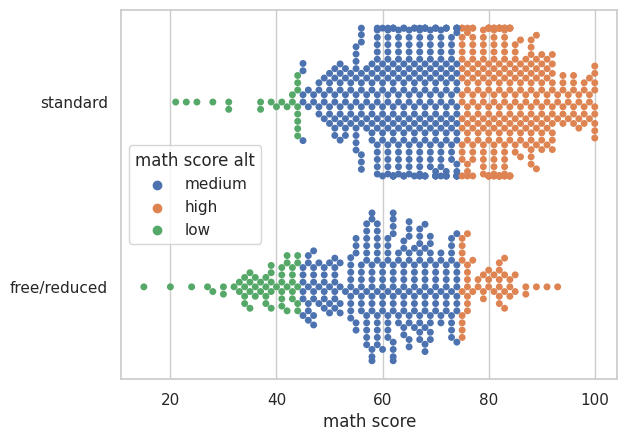

In [ ]:
sns.set_theme(style="whitegrid", palette="deep")

ax = sns.swarmplot(data=data, x="math score", y="lunch", hue="math score alt")
ax.set(ylabel="")

[Text(-36.875, 0.5, '')]

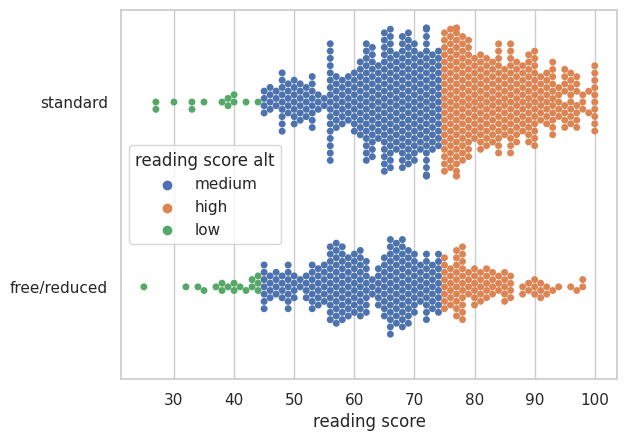

In [ ]:
sns.set_theme(style="whitegrid", palette="deep")

ax = sns.swarmplot(data=data, x="reading score", y="lunch", hue="reading score alt")
ax.set(ylabel="")

[Text(-36.875, 0.5, '')]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


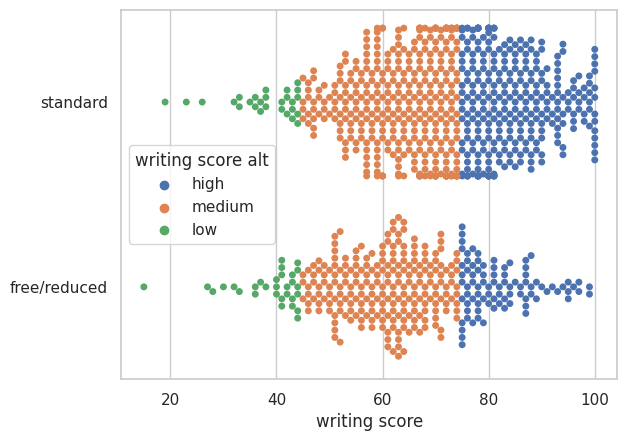

In [ ]:
sns.set_theme(style="whitegrid", palette="deep")

ax = sns.swarmplot(data=data, x="writing score", y="lunch", hue="writing score alt")
ax.set(ylabel="")

In [ ]:
race_math = data.groupby(['race/ethnicity', 'math score alt'])['math score alt'].count()

race_math

race/ethnicity  math score alt
group A         high               20
                low                 5
                medium             54
group B         high               51
                low                17
                medium            130
group C         high               96
                low                29
                medium            198
group D         high               90
                low                21
                medium            146
group E         high               88
                low                 3
                medium             52
Name: math score alt, dtype: int64

<Axes: xlabel='race/ethnicity'>

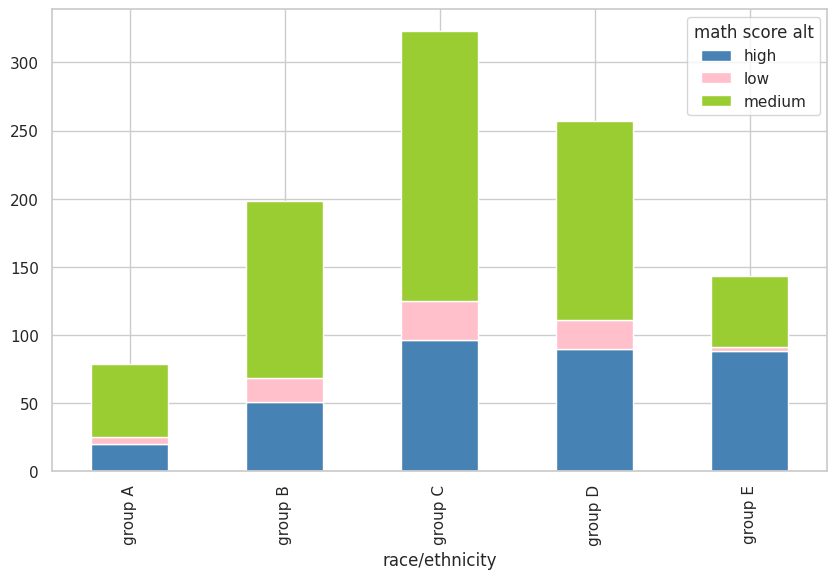

In [ ]:
race_math.unstack().plot(kind='bar', stacked=True, color=['steelblue','pink', 'yellowgreen', 'thistle', 'wheat', 'silver'], figsize=(10,6))

In [ ]:
race_reading = data.groupby(['race/ethnicity', 'reading score alt'])['reading score alt'].count()

race_reading

race/ethnicity  reading score alt
group A         high                  29
                low                    2
                medium                48
group B         high                  66
                low                    5
                medium               127
group C         high                 117
                low                   16
                medium               190
group D         high                 102
                low                    6
                medium               149
group E         high                  86
                low                    1
                medium                56
Name: reading score alt, dtype: int64

<Axes: xlabel='race/ethnicity'>

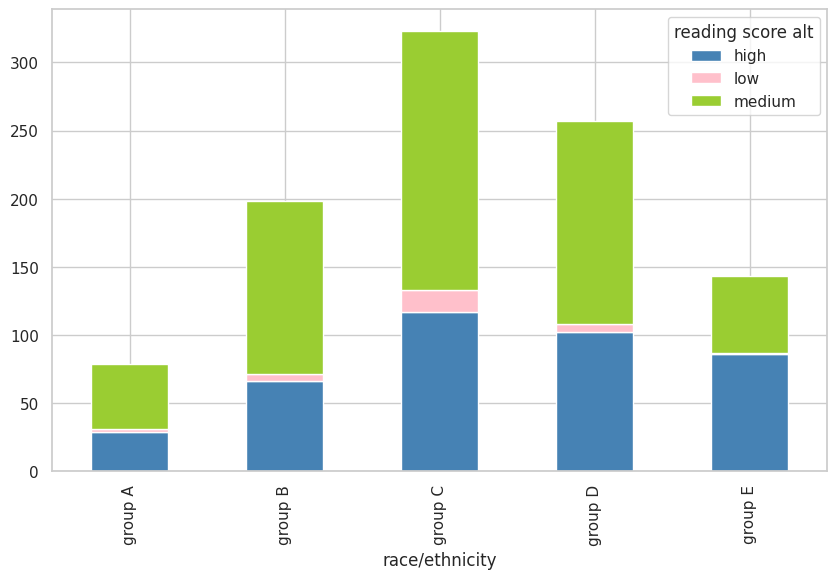

In [ ]:
race_reading.unstack().plot(kind='bar', stacked=True, color=['steelblue','pink', 'yellowgreen', 'thistle', 'wheat', 'silver'], figsize=(10,6))

In [ ]:
race_writing = data.groupby(['race/ethnicity', 'writing score alt'])['writing score alt'].count()


<Axes: xlabel='race/ethnicity'>

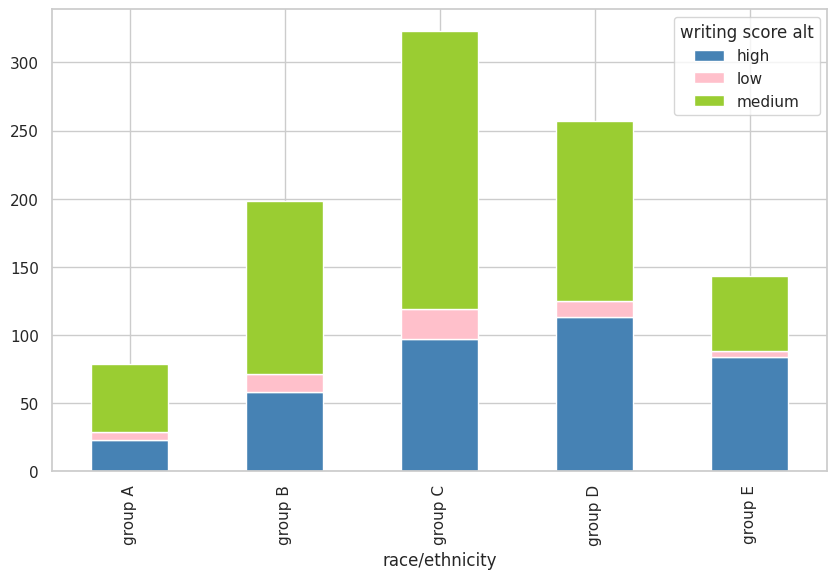

In [ ]:
race_writing.unstack().plot(kind='bar', stacked=True, color=['steelblue','pink', 'yellowgreen', 'thistle', 'wheat', 'silver'], figsize=(10,6))

### Feature encoding

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,writing score alt,reading score alt,math score alt
0,female,group D,some college,standard,completed,59,70,78,high,medium,medium
1,male,group D,associate's degree,standard,none,96,93,87,high,high,high
2,female,group D,some college,free/reduced,none,57,76,77,high,high,medium
3,male,group B,some college,free/reduced,none,70,70,63,medium,medium,medium
4,female,group D,associate's degree,standard,none,83,85,86,high,high,high


In [28]:
#encoding binary features
data_copy = data.copy()
data_copy['gender'] = data_copy['gender'].apply(lambda x : 1 if x =='male' else 0)
data_copy['lunch'] = data_copy['lunch'].apply(lambda x : 1 if x =='standard' else 0)
data_copy['test preparation course'] = data_copy['test preparation course'].apply(lambda x : 1 if x =='completed' else 0)

In [27]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.3 MB/s eta 0:00:00


In [29]:
import category_encoders as ce

In [30]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(data_copy[['parental level of education']])
data_copy = data_copy.drop(['parental level of education'], axis=1)
data_copy = pd.concat([data_copy, data_bin], axis=1)

data_copy

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,math score alt,reading score alt,writing score alt,parental level of education
0,0,group D,1,1,59,70,78,medium,medium,high,1
1,1,group D,1,0,96,93,87,high,high,high,2
2,0,group D,0,0,57,76,77,medium,high,high,1
3,1,group B,0,0,70,70,63,medium,medium,medium,1
4,0,group D,1,0,83,85,86,high,high,high,2
...,...,...,...,...,...,...,...,...,...,...,...
995,1,group C,1,0,77,77,71,high,high,medium,1
996,1,group C,1,0,80,66,66,high,medium,medium,1
997,0,group A,1,1,67,86,86,medium,high,high,6
998,1,group E,1,0,80,72,62,high,medium,medium,6


In [31]:
encoder = ce.OneHotEncoder(cols=['race/ethnicity'], use_cat_names=True) 
type_bin = encoder.fit_transform(data_copy['race/ethnicity'])
data_copy = pd.concat([data_copy, type_bin], axis=1)

data_copy.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,math score alt,reading score alt,writing score alt,parental level of education,race/ethnicity_group D,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group E,race/ethnicity_group A
0,0,group D,1,1,59,70,78,medium,medium,high,1,1,0,0,0,0
1,1,group D,1,0,96,93,87,high,high,high,2,1,0,0,0,0
2,0,group D,0,0,57,76,77,medium,high,high,1,1,0,0,0,0
3,1,group B,0,0,70,70,63,medium,medium,medium,1,0,1,0,0,0
4,0,group D,1,0,83,85,86,high,high,high,2,1,0,0,0,0


In [32]:
data_copy = data_copy.drop(['race/ethnicity', 'math score alt', 'reading score alt', 'writing score alt'], axis=1)

# Prediction

<Axes: >

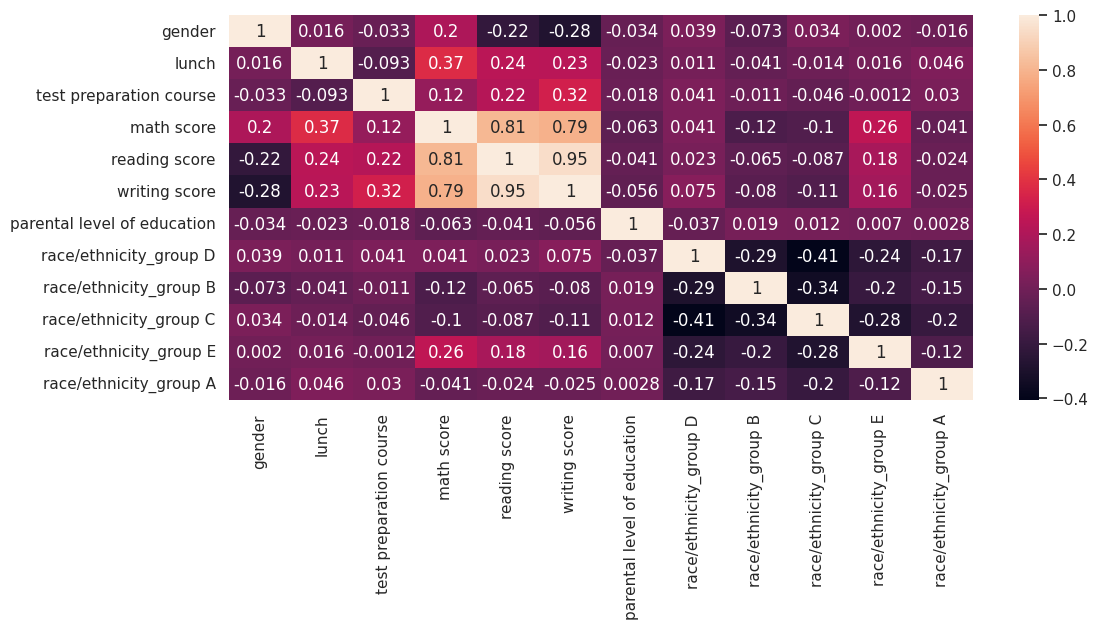

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 5))
sns.heatmap(data_copy.corr(), annot=True)

So at this point, I don't think we can use a linear regression model since there are no high correlation scores here. We'll try Adaboost. I will not be normalizing data as decision trees can work with messy data.

In [45]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## Math score prediction


In [35]:
X = data_copy.drop(['math score'], axis=1)
y = data_copy['math score']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [42]:
dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42 
)
ada = AdaBoostRegressor(
    base_estimator=dt, 
    random_state=42,
    n_estimators=50 
)

ada.fit(X_train, y_train)
ada_pred  = ada.predict(X_test)
print(f'MSE score {round(mean_squared_error(y_test, ada_pred),2)}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MSE score 38.36


In [43]:
dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42 
)
ada = AdaBoostRegressor(
    base_estimator=dt, 
    random_state=42,
    n_estimators=60 
)

ada.fit(X_train, y_train)
ada_pred  = ada.predict(X_test)
print(f'MSE score {round(mean_squared_error(y_test, ada_pred),2)}')


MSE score 37.8


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [44]:
dt = DecisionTreeRegressor(
    max_depth=5, 
    random_state=42 
)
ada = AdaBoostRegressor(
    base_estimator=dt, 
    random_state=42,
    n_estimators=100 
)

ada.fit(X_train, y_train)
ada_pred  = ada.predict(X_test)
print(f'MSE score {round(mean_squared_error(y_test, ada_pred),2)}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MSE score 32.57


I'll try gradient boosting as well to see if we can reduce the error.

In [48]:
gb = GradientBoostingRegressor(
    max_depth=3, 
    n_estimators=10, 
    random_state=42
)

gb.fit(X_train, y_train)

gb_pred  = gb.predict(X_test)

print(f'MSE score {round(mean_squared_error(y_test, gb_pred),2)}')

MSE score 69.6


In [47]:
gb = GradientBoostingRegressor(
    max_depth=5, 
    n_estimators=100, 
    random_state=42
)

gb.fit(X_train, y_train)

gb_pred  = gb.predict(X_test)

print(f'MSE score {round(mean_squared_error(y_test, gb_pred),2)}')

MSE score 33.86


Gradient boosting's MSE is close but still higher than Adaboost's results. 